In [ ]:
a = 'sample_submission'
a.upper()

'SAMPLE_SUBMISSION'

1o passo: treina [ train ] | testa  [ test ] | valida [ valid ] => analisa os 
dados



2o passo: treina [ train + test ] | testa  [ valid ] |  => analisa os dados



3o passo: treina [ train + test + valid] | => seja o que Deus quiser

=> Correlação - PCA

=> Redução de Dimensionalidade - Generalized Low Rank Models (GLRM)

##IMPORTS


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.impute import SimpleImputer

##DATA VIEW


SAMPLE_SUBMISSION

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/UFRJ/machine_learning/sample_submission.csv')
sample_submission

,id,failure
0,26570,0.0
1,26571,0.0
2,26572,0.0
3,26573,0.0
4,26574,0.0
...,...,...
20770,47340,0.0
20771,47341,0.0
20772,47342,0.0
20773,47343,0.0


TABELA 1 | TRAIN

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/UFRJ/machine_learning/train.csv')
df_train.head(3)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0


TABELA 2 | TEST

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/UFRJ/machine_learning/test.csv')
df_test.head(3)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995


CONCATENANDO OS DATAFRAMES

In [ ]:
df = pd.merge(df_train, df_test, how='outer')
df.shape

(47345, 26)

In [ ]:
df

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.5940,15.193,15.029,16.040,13.034,14.684,764.100,0.0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.9150,11.755,14.732,15.425,14.395,15.631,682.057,0.0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,19.2115,13.798,16.711,18.631,14.094,17.946,663.376,0.0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.3770,10.020,15.250,15.562,16.154,17.172,826.282,0.0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.9320,12.428,16.182,12.760,13.153,16.412,579.885,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,47340,I,144.74,material_7,material_5,9,5,0,4,9,...,11.691,NaN,19.7710,11.562,17.246,15.131,15.209,NaN,696.466,NaN
47341,47341,I,74.53,material_7,material_5,9,5,4,8,7,...,10.980,16.027,15.6940,13.564,15.494,15.296,13.812,16.501,613.249,NaN
47342,47342,I,67.73,material_7,material_5,9,5,10,11,2,...,10.436,16.137,20.6120,11.134,16.519,15.525,14.175,17.728,783.349,NaN
47343,47343,I,126.15,material_7,material_5,9,5,8,16,11,...,12.672,15.422,19.4960,9.319,15.817,17.403,16.437,15.179,745.210,NaN


AVALIANDO O DATASET

In [ ]:
df.shape

(26570, 26)

VERIFICANDO A PRESENÇA DAS FEATURES EM AMBOS OS DATASETS

In [ ]:
df_train.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17',
       'failure'],
      dtype='object')

In [ ]:
df_test.columns

Index(['id', 'product_code', 'loading', 'attribute_0', 'attribute_1',
       'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17'],
      dtype='object')

FEATURE PRESENTE APENAS NO DATASET DE TREINO

**0:**  FALHA


**1:**  NÃO FALHA

In [ ]:
df_train['failure'].value_counts()

0    20921
1     5649
Name: failure, dtype: int64

DIVISÃO DOS DADOS DE TRAIN | 70% 

In [ ]:
len(df)

47345

In [ ]:
#SEPARAR ALEATORIAMENTE 70% DOS DADOS PARA TREINO
df_train_final = df.sample(frac=0.7, random_state=60)
print('CRIAÇÃO DO DATAFRAME DE TREINO | 70%')
print()
df_train_final

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
39547,39547,H,230.99,material_7,material_7,7,9,4,5,5,...,11.012,15.768,20.567,11.948,13.359,15.729,15.525,15.007,565.5570,NaN
2466,2466,A,148.65,material_7,material_8,9,5,13,3,3,...,11.430,14.589,20.900,11.473,14.529,17.147,18.782,17.465,709.3440,1.0
33677,33677,G,96.66,material_5,material_6,9,7,11,8,2,...,10.268,16.011,17.329,9.854,16.670,NaN,13.951,17.088,789.5440,NaN
31543,31543,F,134.86,material_5,material_6,6,4,7,14,10,...,10.851,17.518,18.285,11.978,13.803,16.516,13.999,NaN,691.1650,NaN
43495,43495,I,121.61,material_7,material_5,9,5,0,9,12,...,10.617,17.718,17.937,13.597,14.994,18.416,13.560,16.699,686.2200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43227,43227,I,NaN,material_7,material_5,9,5,9,3,8,...,11.984,15.968,20.320,12.794,17.052,16.606,15.914,20.030,718.7720,NaN
242,242,A,137.51,material_7,material_8,9,5,18,2,7,...,12.531,16.254,21.770,14.717,16.637,16.333,16.447,19.464,603.8820,0.0
25946,25946,E,171.95,material_7,material_6,6,9,6,9,2,...,11.880,17.315,17.952,8.578,16.461,16.253,16.979,17.014,511.3690,1.0
27405,27405,F,180.44,material_5,material_6,6,4,10,23,4,...,11.314,14.129,19.079,11.844,14.335,15.322,13.446,NaN,642.1870,NaN


DIVISÃO DOS DADOS DE TEST | 20% 

In [ ]:
#SEPARAR ALEATORIAMENTE 20% DOS DADOS PARA TESTE
df_test_final = df.sample(frac=0.2, random_state=60)
print('CRIAÇÃO DO DATAFRAME DE TEST | 20%')
print()
df_test_final

CRIAÇÃO DO DATAFRAME DE TEST | 20%



,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
39547,39547,H,230.99,material_7,material_7,7,9,4,5,5,...,11.012,15.768,20.567,11.948,13.3590,15.729,15.525,15.007,565.5570,NaN
2466,2466,A,148.65,material_7,material_8,9,5,13,3,3,...,11.430,14.589,20.900,11.473,14.5290,17.147,18.782,17.465,709.3440,1.0
33677,33677,G,96.66,material_5,material_6,9,7,11,8,2,...,10.268,16.011,17.329,9.854,16.6700,NaN,13.951,17.088,789.5440,NaN
31543,31543,F,134.86,material_5,material_6,6,4,7,14,10,...,10.851,17.518,18.285,11.978,13.8030,16.516,13.999,NaN,691.1650,NaN
43495,43495,I,121.61,material_7,material_5,9,5,0,9,12,...,10.617,17.718,17.937,13.597,14.9940,18.416,13.560,16.699,686.2200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22469,22469,E,119.63,material_7,material_6,6,9,5,8,11,...,10.656,17.838,19.617,11.222,15.4500,16.407,16.004,17.019,701.0245,0.0
1257,1257,A,116.11,material_7,material_8,9,5,11,1,4,...,10.506,17.974,20.555,11.038,15.6285,14.016,14.714,19.316,694.4280,1.0
43794,43794,I,73.71,material_7,material_5,9,5,11,12,8,...,10.305,16.579,NaN,NaN,17.4520,15.867,15.482,NaN,NaN,NaN
14718,14718,C,129.87,material_7,material_8,5,8,5,9,7,...,11.329,17.501,20.403,8.548,16.4730,14.961,17.064,18.613,620.7190,0.0


DIVISÃO DOS DADOS DE VALIDAÇÃO | 10% 

In [ ]:
#SEPARAR ALEATORIAMENTE 10% DOS DADOS PARA VALIDAÇÃO
df_valid_final = df.sample(frac=0.1, random_state=60)
print('CRIAÇÃO DO DATAFRAME DE VALIDAÇÃO | 10%')
print()
df_valid_final

CRIAÇÃO DO DATAFRAME DE VALIDAÇÃO | 10%



,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
39547,39547,H,230.99,material_7,material_7,7,9,4,5,5,...,11.012,15.768,20.567,11.948,13.359,15.729,15.525,15.007,565.557,NaN
2466,2466,A,148.65,material_7,material_8,9,5,13,3,3,...,11.430,14.589,20.900,11.473,14.529,17.147,18.782,17.465,709.344,1.0
33677,33677,G,96.66,material_5,material_6,9,7,11,8,2,...,10.268,16.011,17.329,9.854,16.670,NaN,13.951,17.088,789.544,NaN
31543,31543,F,134.86,material_5,material_6,6,4,7,14,10,...,10.851,17.518,18.285,11.978,13.803,16.516,13.999,NaN,691.165,NaN
43495,43495,I,121.61,material_7,material_5,9,5,0,9,12,...,10.617,17.718,17.937,13.597,14.994,18.416,13.560,16.699,686.220,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25955,25955,E,186.56,material_7,material_6,6,9,7,11,3,...,11.614,17.101,19.996,10.864,15.108,16.040,14.731,18.224,643.905,0.0
14521,14521,C,101.24,material_7,material_8,5,8,10,10,11,...,11.198,14.679,21.042,11.781,17.229,15.626,13.384,15.838,826.051,0.0
9410,9410,B,168.25,material_5,material_5,8,8,10,6,5,...,11.392,16.864,17.448,13.221,16.179,16.223,15.468,16.188,673.698,0.0
44699,44699,I,159.38,material_7,material_5,9,5,11,6,2,...,NaN,16.254,20.356,9.748,15.092,NaN,16.382,16.551,743.641,NaN


DIVISÃO ALEATÓRIA DO DATAFRAME

## O PROBLEMA...

Esses dados representam os resultados de um grande estudo de teste de produtos. Para cada um product_code, você recebe um número de produto attributes(fixado para o código), bem como um número de measurement valores para cada produto individual, representando vários métodos de teste de laboratório.

Cada produto é usado em um experimento simulado de ambiente do mundo real e absorve uma certa quantidade de fluido (loading) para ver se falha ou não.

Sua tarefa é usar os dados para prever falhas de novos códigos de produtos individuais com seus resultados de testes de laboratório individuais.

##CARACTERISTICAS DAS FEATURES

**product_code:**
PRODUTO


**attribute:**
NÚMERO DE PRODUTOS


**measurement:**
VALOR PARA CADA PRODUTO


**loading:**
PRODUTO TESTADO PARA ABSORVER UMA QTDE DE FLÚIDO PARA AVALIAR SE FALHA OU NÃO


**failure:**
FALHA [ 0 ] OU NÃO FALHA [ 1 ]

##PREPARAÇÃO DO DATASER DE TREINO

In [ ]:
df_train_final

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
39547,39547,H,230.99,material_7,material_7,7,9,4,5,5,...,11.012,15.768,20.567,11.948,13.359,15.729,15.525,15.007,565.5570,NaN
2466,2466,A,148.65,material_7,material_8,9,5,13,3,3,...,11.430,14.589,20.900,11.473,14.529,17.147,18.782,17.465,709.3440,1.0
33677,33677,G,96.66,material_5,material_6,9,7,11,8,2,...,10.268,16.011,17.329,9.854,16.670,NaN,13.951,17.088,789.5440,NaN
31543,31543,F,134.86,material_5,material_6,6,4,7,14,10,...,10.851,17.518,18.285,11.978,13.803,16.516,13.999,NaN,691.1650,NaN
43495,43495,I,121.61,material_7,material_5,9,5,0,9,12,...,10.617,17.718,17.937,13.597,14.994,18.416,13.560,16.699,686.2200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43227,43227,I,NaN,material_7,material_5,9,5,9,3,8,...,11.984,15.968,20.320,12.794,17.052,16.606,15.914,20.030,718.7720,NaN
242,242,A,137.51,material_7,material_8,9,5,18,2,7,...,12.531,16.254,21.770,14.717,16.637,16.333,16.447,19.464,603.8820,0.0
25946,25946,E,171.95,material_7,material_6,6,9,6,9,2,...,11.880,17.315,17.952,8.578,16.461,16.253,16.979,17.014,511.3690,1.0
27405,27405,F,180.44,material_5,material_6,6,4,10,23,4,...,11.314,14.129,19.079,11.844,14.335,15.322,13.446,NaN,642.1870,NaN


VERIFICANDO A PRESENÇA DE DADOS NULOS

In [ ]:
df_train_final.isnull().sum()

id                    0
product_code          0
loading             155
attribute_0           0
attribute_1           0
attribute_2           0
attribute_3           0
measurement_0         0
measurement_1         0
measurement_2         0
measurement_3       231
measurement_4       278
measurement_5       351
measurement_6       451
measurement_7       519
measurement_8       593
measurement_9       636
measurement_10      755
measurement_11      785
measurement_12      868
measurement_13      907
measurement_14      983
measurement_15     1076
measurement_16     1195
measurement_17     1252
failure           14621
dtype: int64

VERIFICANDO A DIFERENÇA ENTRE MÉDIA E MEDIANA

In [ ]:
df_train_final.describe()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,33142.000000,32987.000000,33142.000000,33142.000000,33142.000000,33142.000000,33142.000000,32911.000000,32864.000000,32791.000000,...,32506.000000,32387.000000,32357.000000,32274.000000,32235.00000,32159.000000,32066.000000,31947.000000,31890.000000,18521.000000
mean,23726.439080,127.752929,7.181582,6.775119,7.429123,8.572114,6.193440,17.791708,11.726205,17.136033,...,11.424523,16.122875,19.028297,11.795446,15.68701,16.078985,15.048078,16.528565,701.932169,0.212462
std,13661.156158,39.028826,1.481948,1.757507,4.189158,4.291860,3.556485,0.997146,0.996189,0.992562,...,0.985521,1.454613,1.535285,1.403787,1.22450,1.419046,1.508585,1.638107,123.544931,0.409061
min,0.000000,33.160000,5.000000,4.000000,0.000000,0.000000,0.000000,13.565000,7.384000,12.073000,...,7.537000,9.167000,12.703000,5.562000,9.20900,9.140000,8.417000,9.701000,87.635000,0.000000
25%,11876.250000,99.915000,6.000000,5.000000,4.000000,5.000000,4.000000,17.123000,11.060000,16.466000,...,10.771000,15.198000,17.985000,10.908000,14.92400,15.179000,14.064000,15.432000,624.660000,0.000000
50%,23792.500000,122.390000,7.000000,7.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,...,11.430000,16.127000,19.108000,11.763000,15.62850,16.040000,14.969000,16.436000,701.024500,0.000000
75%,35523.750000,148.840000,9.000000,8.000000,10.000000,11.000000,8.000000,18.465000,12.398000,17.802000,...,12.078000,17.054000,20.069000,12.705750,16.42700,16.997000,15.999000,17.636000,779.688250,0.000000
max,47344.000000,385.860000,9.000000,9.000000,28.000000,33.000000,26.000000,21.499000,15.623000,21.681000,...,15.412000,23.354000,25.640000,18.962000,22.71300,23.140000,22.012000,24.094000,1312.794000,1.000000


PREENCHENDO OS VALORS NANs USANDO "SAMPLEIMPUTER" DO SKLEARN

In [ ]:
most_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
most_imputer

SimpleImputer(strategy='median')

PREENCHENDO AS COLUNAS COM A MEDIANA

In [ ]:
df_train_final.loading = most_imputer.fit_transform(df_train_final[['loading']])
df_train_final.measurement_3 = most_imputer.fit_transform(df_train_final[['measurement_3']])
df_train_final.measurement_4 = most_imputer.fit_transform(df_train_final[['measurement_4']])
df_train_final.measurement_5 = most_imputer.fit_transform(df_train_final[['measurement_5']])
df_train_final.measurement_6 = most_imputer.fit_transform(df_train_final[['measurement_6']])
df_train_final.measurement_7 = most_imputer.fit_transform(df_train_final[['measurement_7']])
df_train_final.measurement_8 = most_imputer.fit_transform(df_train_final[['measurement_8']])
df_train_final.measurement_9 = most_imputer.fit_transform(df_train_final[['measurement_9']])
df_train_final.measurement_10 = most_imputer.fit_transform(df_train_final[['measurement_10']])
df_train_final.measurement_11 = most_imputer.fit_transform(df_train_final[['measurement_11']])
df_train_final.measurement_12 = most_imputer.fit_transform(df_train_final[['measurement_12']])
df_train_final.measurement_13 = most_imputer.fit_transform(df_train_final[['measurement_13']])
df_train_final.measurement_14 = most_imputer.fit_transform(df_train_final[['measurement_14']])
df_train_final.measurement_15 = most_imputer.fit_transform(df_train_final[['measurement_15']])
df_train_final.measurement_16 = most_imputer.fit_transform(df_train_final[['measurement_16']])
df_train_final.measurement_17 = most_imputer.fit_transform(df_train_final[['measurement_17']])

In [ ]:
# df_train.loading = most_imputer.fit_transform(df_train[['loading']])
# df_train.measurement_3 = most_imputer.fit_transform(df_train[['measurement_3']])
# df_train.measurement_4 = most_imputer.fit_transform(df_train[['measurement_4']])
# df_train.measurement_5 = most_imputer.fit_transform(df_train[['measurement_5']])
# df_train.measurement_6 = most_imputer.fit_transform(df_train[['measurement_6']])
# df_train.measurement_7 = most_imputer.fit_transform(df_train[['measurement_7']])
# df_train.measurement_8 = most_imputer.fit_transform(df_train[['measurement_8']])
# df_train.measurement_9 = most_imputer.fit_transform(df_train[['measurement_9']])
# df_train.measurement_10 = most_imputer.fit_transform(df_train[['measurement_10']])
# df_train.measurement_11 = most_imputer.fit_transform(df_train[['measurement_11']])
# df_train.measurement_12 = most_imputer.fit_transform(df_train[['measurement_12']])
# df_train.measurement_13 = most_imputer.fit_transform(df_train[['measurement_13']])
# df_train.measurement_14 = most_imputer.fit_transform(df_train[['measurement_14']])
# df_train.measurement_15 = most_imputer.fit_transform(df_train[['measurement_15']])
# df_train.measurement_16 = most_imputer.fit_transform(df_train[['measurement_16']])
# df_train.measurement_17 = most_imputer.fit_transform(df_train[['measurement_17']])

VERIFICANDO SE TODAS AS FEATURES COM DADOS NANs FORAM PREENCHIDAS COM A MEDIANA

In [ ]:
df_train.isnull().sum()

id                0
product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
failure           0
dtype: int64

AVALIANDO OS PRODUTOS

QTDE DE VALORES POR PRODUTOS

In [ ]:
df_train_final['product_code'].value_counts()

C    3989
F    3872
E    3746
I    3691
B    3672
D    3582
G    3539
A    3532
H    3519
Name: product_code, dtype: int64

In [ ]:
df_test_final['product_code'].value_counts()

C    1132
F    1087
B    1066
E    1058
A    1053
I    1044
D    1029
G    1020
H     980
Name: product_code, dtype: int64

In [ ]:
df_valid_final['product_code'].value_counts()

A    558
C    548
I    539
B    537
D    519
E    516
F    514
G    504
H    499
Name: product_code, dtype: int64

QTDE DE VALORES ÚNICOS

In [ ]:
df_train_final['product_code'].unique()

array(['H', 'A', 'G', 'F', 'I', 'D', 'E', 'C', 'B'], dtype=object)

In [ ]:
df_test_final['product_code'].unique()

array(['H', 'A', 'G', 'F', 'I', 'D', 'E', 'C', 'B'], dtype=object)

In [ ]:
df_valid_final['product_code'].unique()

array(['H', 'A', 'G', 'F', 'I', 'D', 'E', 'C', 'B'], dtype=object)

VERIFICANDO A PRESENÇA DE OUTLIERS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


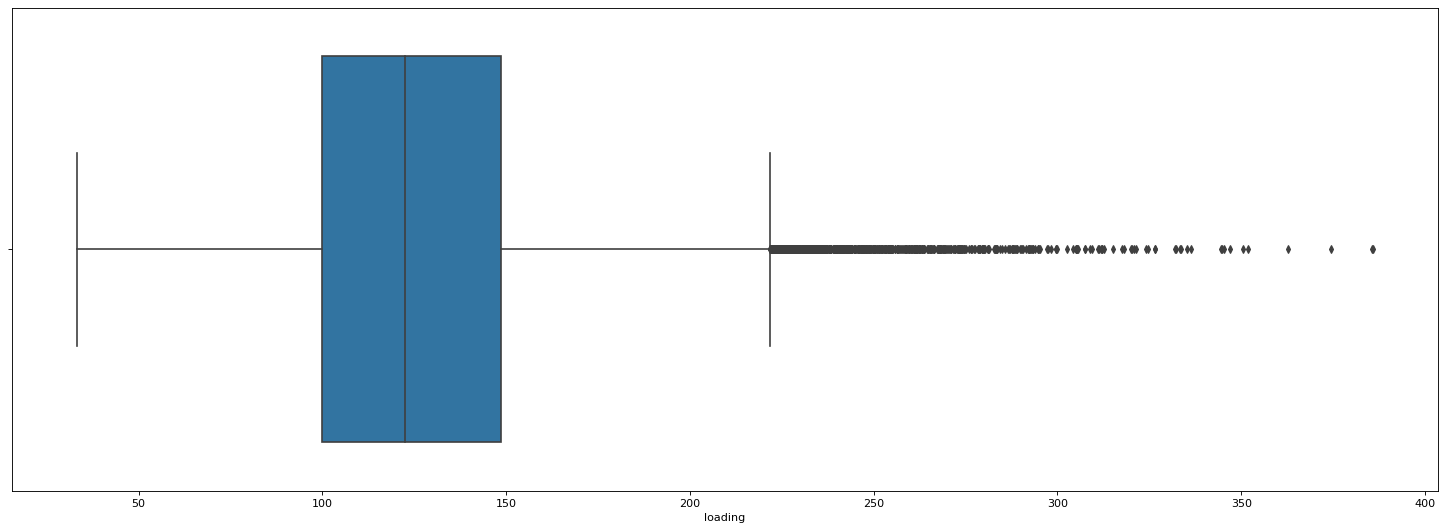

In [ ]:
plt.figure(figsize=(23, 8), dpi=80)
sns.boxplot(df_train_final['loading'])
plt.show();

MÉTODO DO DESVIO PADRÃO

In [ ]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33142 entries, 39547 to 13861
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              33142 non-null  int64  
 1   product_code    33142 non-null  object 
 2   loading         33142 non-null  float64
 3   attribute_0     33142 non-null  object 
 4   attribute_1     33142 non-null  object 
 5   attribute_2     33142 non-null  int64  
 6   attribute_3     33142 non-null  int64  
 7   measurement_0   33142 non-null  int64  
 8   measurement_1   33142 non-null  int64  
 9   measurement_2   33142 non-null  int64  
 10  measurement_3   33142 non-null  float64
 11  measurement_4   33142 non-null  float64
 12  measurement_5   33142 non-null  float64
 13  measurement_6   33142 non-null  float64
 14  measurement_7   33142 non-null  float64
 15  measurement_8   33142 non-null  float64
 16  measurement_9   33142 non-null  float64
 17  measurement_10  33142 non-n

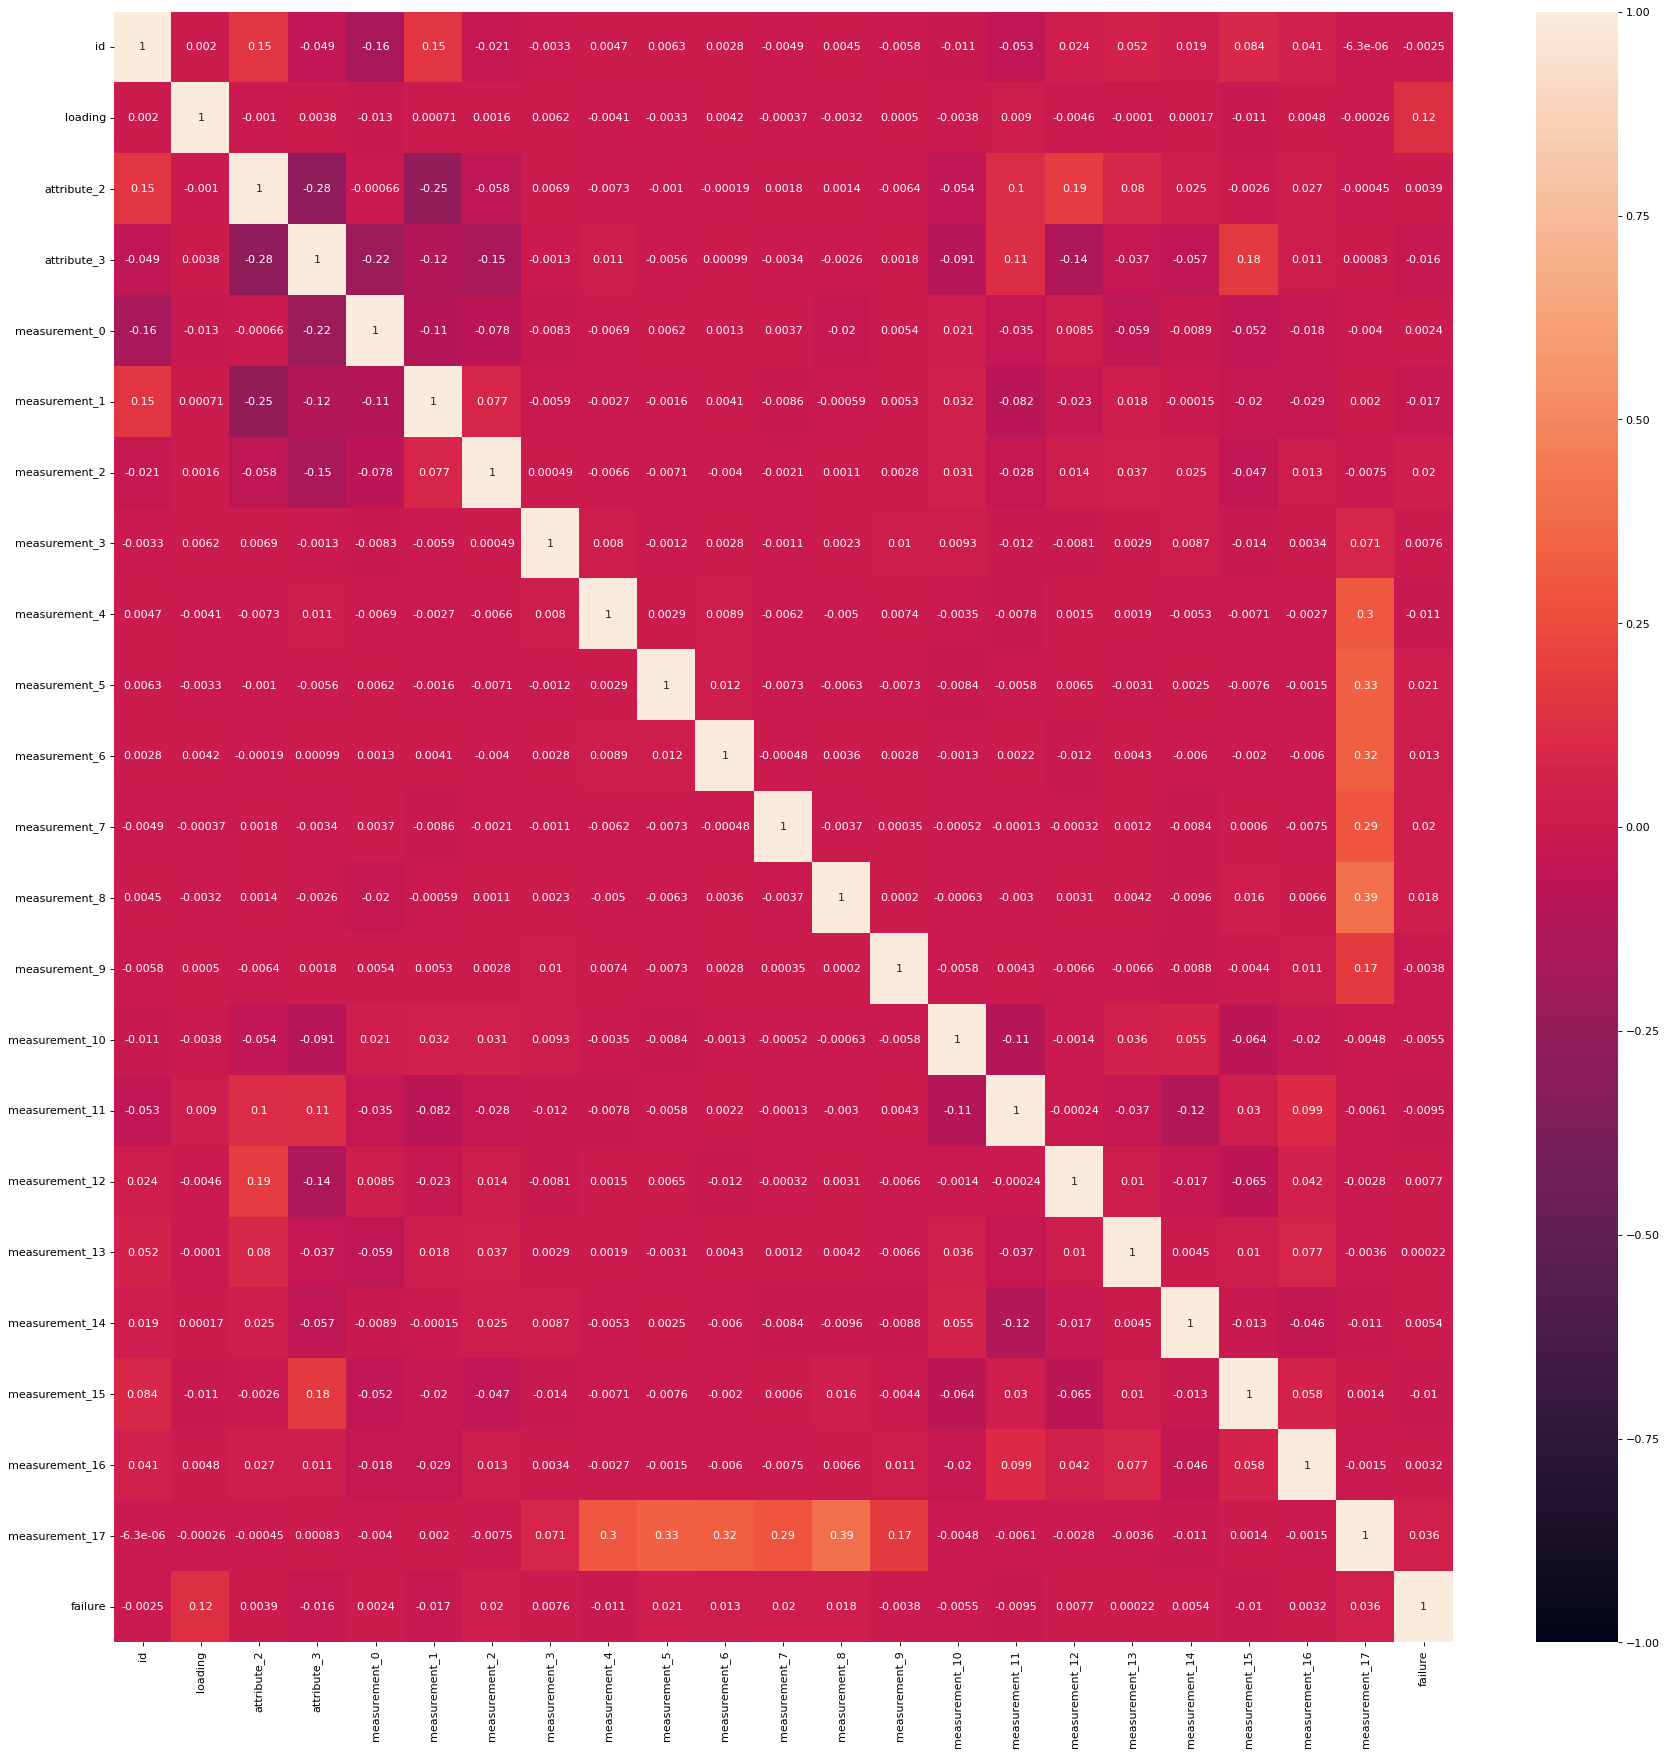

In [ ]:
plt.figure(figsize=(27, 27), dpi=80)
sns.heatmap(df_train_final.corr(), annot=True, vmin=-1, vmax=1)

In [ ]:
sns.pairplot(df_train_final, hue='product_code')

In [ ]:
dt_mean, dt_std = np.mean(df_train['loading']), np.std(df_train['loading'])
cut_off = dt_std * 3

lower, upper = dt_mean - cut_off, dt_mean + cut_off
idx = np.where((df_train['loading'] < lower) | (df_train['loading'] > upper))

In [ ]:
# plot
pyplot.scatter(data1, data2)
pyplot.title('Gráfico de Dispersão entre data1 e data2')
pyplot.show()